In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
wbcd = pd.read_csv("/home/kavita/kavita/predictive analytics/wisc_bc_data-2.csv")

In [97]:
wbcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [98]:
wbcd.head().T

,0,1,2,3,4
id,87139402,8910251,905520,868871,9012568
diagnosis,B,B,B,B,B
radius_mean,12.32,10.6,11.04,11.28,15.19
texture_mean,12.39,18.95,16.83,13.39,13.21
perimeter_mean,78.85,69.28,70.92,73,97.65
area_mean,464.1,346.4,373.2,384.8,711.8
smoothness_mean,0.1028,0.09688,0.1077,0.1164,0.07963
compactness_mean,0.06981,0.1147,0.07804,0.1136,0.06934
concavity_mean,0.03987,0.06387,0.03046,0.04635,0.03393
points_mean,0.037,0.02642,0.0248,0.04796,0.02657


In [99]:
wbcd.shape

(569, 32)

In [100]:
wbcd.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [101]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [102]:
wbcd = wbcd.drop(['id'], axis = 1)
wbcd.shape

(569, 31)

In [103]:
wbcd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [104]:
# is any row NULL?
wbcd.isnull().any().any()

False

In [105]:
wbcd.isnull().sum(axis = 0)

## depending upon teh missing vakues take appropriate action either delete and impute 
# the values 

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [106]:
# table of diagnosis
wbcd['diagnosis']. value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [107]:
# Proporational
wbcd['diagnosis']. value_counts()/wbcd.shape[0]


B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [108]:
# create design matrix X and target vector y
y = wbcd['diagnosis']
x = wbcd.drop(['diagnosis'], axis =1)
print(x.shape)
x_scaled = MinMaxScaler().fit_transform(x)

(569, 30)


In [109]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 82)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


## Fitting Gaussian model to the dataset:- ##

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_test=gnb.fit(x_train, y_train)

In [111]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(x_test)
print(y_pred)


['B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'B']


[[72  1]
 [ 4 37]]


Text(91.68, 0.5, 'Predicted')

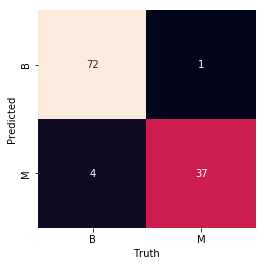

In [112]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
CM_test=confusion_matrix(y_test,y_pred)
names = np.unique(y_pred)
print(CM_test)
sns.heatmap(CM_test, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [113]:
# Test_Accuracy_gnb=accuracy_score(y_test,y_pred)
Test_Accuracy_gnb=accuracy_score(y_test,y_pred)
from sklearn.metrics import classification_report 
print(metrics.classification_report(y_test,y_pred)) 
print(Test_Accuracy_gnb) 

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        73
           M       0.97      0.90      0.94        41

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


In [114]:
gnb_train=gnb.fit(x_test, y_test)
print("score: ", gnb.score(x_test,y_test))
predicted = gnb.predict(x_train)

score:  0.9385964912280702


[[266  18]
 [ 13 158]]


Text(91.68, 0.5, 'Predicted')

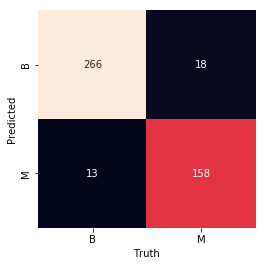

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CM_train=confusion_matrix(y_train,predicted)
names = np.unique(predicted)
print(CM_train)
sns.heatmap(CM_train, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [116]:
Train_Accuracy_gnb=accuracy_score(y_train,predicted)
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(y_train,predicted)) 
print(Train_Accuracy_gnb) 

              precision    recall  f1-score   support

           B       0.95      0.94      0.94       284
           M       0.90      0.92      0.91       171

   micro avg       0.93      0.93      0.93       455
   macro avg       0.93      0.93      0.93       455
weighted avg       0.93      0.93      0.93       455

0.9318681318681319


# Conclusion of Guassian Algorithm :
* Accuracy of Training Data is .9318 %
* Accuracy of Testing Data is .9561%
* Model is performing Good


# Fitting Decision Tree on Dataset: ##

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dt = DecisionTreeClassifier()
dt_model_test = dt.fit(x_train, y_train)

In [118]:
pred_dt = dt.predict(x_test)
print(pred_dt)

['B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'B']


Text(91.68, 0.5, 'Predicted')

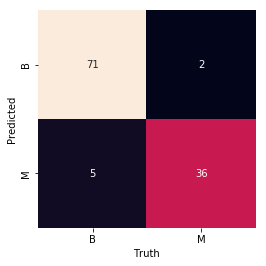

In [119]:
import seaborn as sns
CM_test_dt= confusion_matrix(y_test, pred_dt)
names = np.unique(pred_dt)
sns.heatmap(CM_test_dt, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [120]:
Test_Accuracy_dt=accuracy_score(y_test,pred_dt)
print(metrics.classification_report(y_test, pred_dt)) 
print(Test_Accuracy_dt) 

              precision    recall  f1-score   support

           B       0.93      0.97      0.95        73
           M       0.95      0.88      0.91        41

   micro avg       0.94      0.94      0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

0.9385964912280702


In [121]:
dt_model_train = dt.fit(x_test, y_test)
print("score: ", dt.score(x_test,y_test))
predicted_dt = dt.predict(x_train)

score:  1.0


[[265  19]
 [ 20 151]]


Text(91.68, 0.5, 'Predicted')

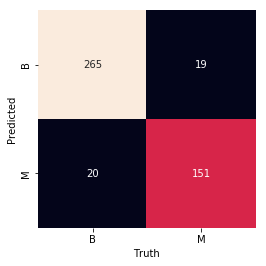

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CM_train_dt=confusion_matrix(y_train,predicted_dt)
names = np.unique(predicted_dt)
print(CM_train_dt)
sns.heatmap(CM_train_dt, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [123]:
print(metrics.classification_report(y_train,predicted_dt)) 
Train_Accuracy_dt=accuracy_score(y_train,predicted_dt)
print(Train_Accuracy_dt) 

              precision    recall  f1-score   support

           B       0.93      0.93      0.93       284
           M       0.89      0.88      0.89       171

   micro avg       0.91      0.91      0.91       455
   macro avg       0.91      0.91      0.91       455
weighted avg       0.91      0.91      0.91       455

0.9142857142857143


# Conclusion of Decision Tree Algorithm :
* Accuracy of Training Data is .9164%
* Accuracy of Testing Data is .9385%


## Fitting RandomForest Model to the dataset: ##

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', oob_score = True) 
Model_rf_test = rf.fit(x_train, y_train)

In [125]:
pred_rf = rf.predict(x_test)  
print(pred_rf)

['B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'B' 'M' 'B' 'B']


In [126]:
# we can predict probabilities also
pred_rf_prob = rf.predict_proba(x_test)[::,1]
pred_rf_prob[0:10]

array([0.04, 0.89, 0.  , 0.02, 0.  , 0.55, 0.87, 0.  , 0.95, 0.  ])

Text(91.68, 0.5, 'Predicted')

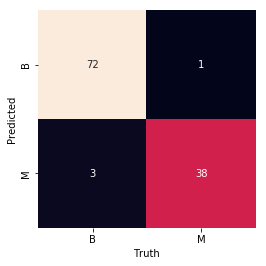

In [127]:
import seaborn as sns
CM_test_rf= confusion_matrix(y_test, pred_rf)
names = np.unique(pred_rf)
sns.heatmap(CM_test_rf, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [128]:
Test_Accuracy_rf=accuracy_score(y_test,pred_rf)
print(metrics.classification_report(y_test, pred_rf)) 
print(Test_Accuracy_rf) 

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        73
           M       0.97      0.93      0.95        41

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544


In [129]:
Model_rf_train= rf.fit(x_test, y_test)
print("score: ", rf.score(x_test,y_test))
predicted_rf = rf.predict(x_train)


score:  1.0


[[263  21]
 [  9 162]]


Text(91.68, 0.5, 'Predicted')

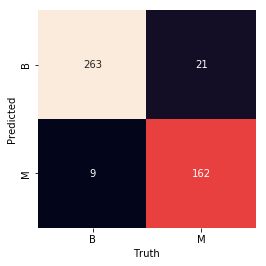

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
CM_train_rf=confusion_matrix(y_train,predicted_rf)
names = np.unique(predicted_rf)
print(CM_train_rf)
sns.heatmap(CM_train_rf, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [131]:
Train_Accuracy_rf=accuracy_score(y_train,predicted_rf)
print(metrics.classification_report(y_train, predicted_rf)) 
print(Train_Accuracy_rf) 

              precision    recall  f1-score   support

           B       0.97      0.93      0.95       284
           M       0.89      0.95      0.92       171

   micro avg       0.93      0.93      0.93       455
   macro avg       0.93      0.94      0.93       455
weighted avg       0.94      0.93      0.93       455

0.9340659340659341


In [132]:

accuracy = metrics.accuracy_score(y_test, pred_rf)
print(f'Out-of-bag score estimate: {Model_rf_test.oob_score_:.3}')
print(f'Mean Accuracy score: {accuracy: .3}')

Out-of-bag score estimate: 0.939
Mean Accuracy score:  0.965


# Conclusion of Random Forest Algorithm :
* Accuracy of Training Data is .9384%
* Accuracy of Testing Data is .9649%


# Conclusion:- For this dataset decision tree performing best.And Linear regression and random forest are also performing good.

# #Comparision of Model

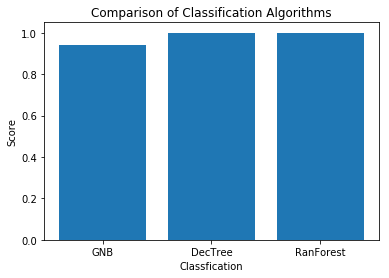

In [133]:
y = np.array([gnb.score(x_test,y_test),dt.score(x_test,y_test),rf.score(x_test,y_test)])
x = ["GNB","DecTree","RanForest"]
plt.bar(x,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication")
plt.ylabel("Score")
plt.show()